In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading dataset from the drive

In [3]:
advertising = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/advertising.csv"))
advertising.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Data Inspection

In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


Data Cleaning Steps

In [12]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


For Outlier Analysis, here I am using Violin Plot


Why Violin Plots?
Combines Boxplot and KDE: Shows outliers, median, and density of data.
Better for Distributions: Provides more insights into the shape of the data.

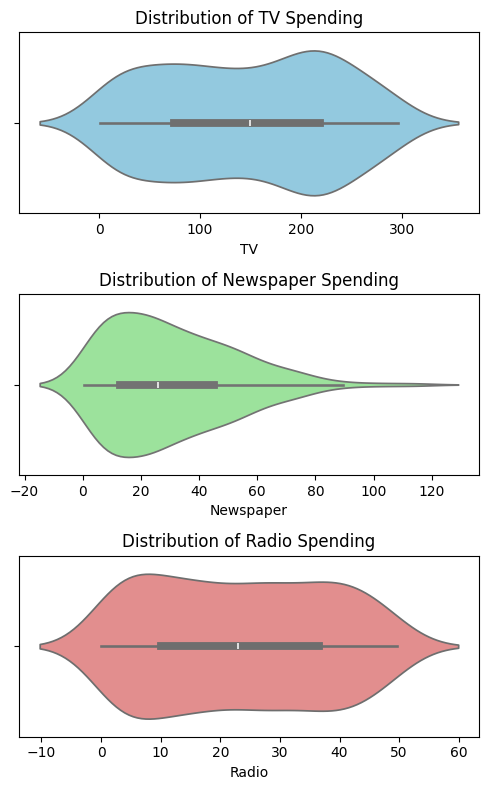

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
fig, axs = plt.subplots(3, figsize=(5, 8))

# Violin Plots
plt1 = sns.violinplot(x=advertising['TV'], ax=axs[0], color="skyblue")
axs[0].set_title("Distribution of TV Spending")

plt2 = sns.violinplot(x=advertising['Newspaper'], ax=axs[1], color="lightgreen")
axs[1].set_title("Distribution of Newspaper Spending")

plt3 = sns.violinplot(x=advertising['Radio'], ax=axs[2], color="lightcoral")
axs[2].set_title("Distribution of Radio Spending")

# Adjust layout
plt.tight_layout()
plt.show()


Exploratory Data Analysis (EDA):

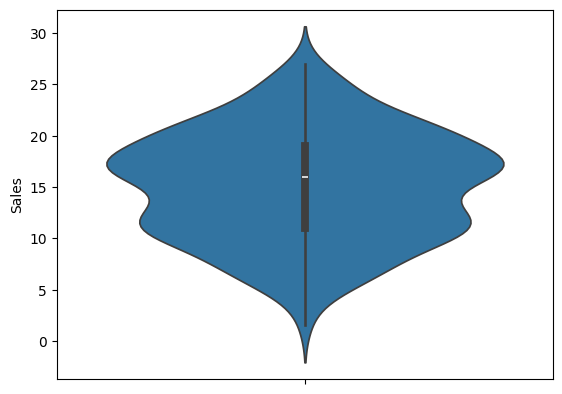

In [14]:
sns.violinplot(advertising['Sales'])
plt.show()

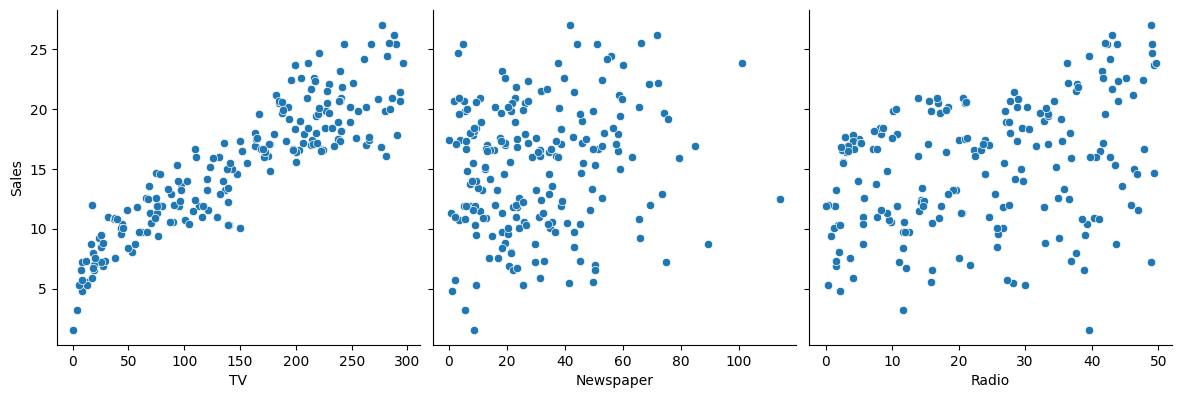

In [15]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

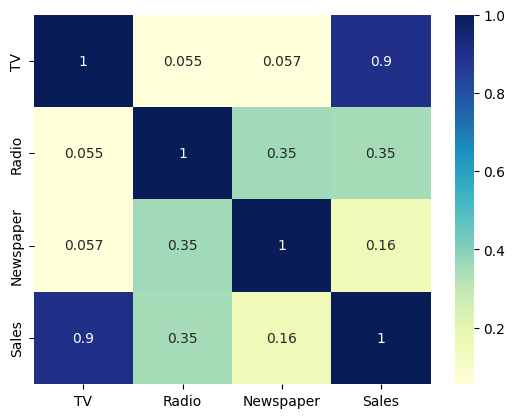

In [16]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

Building the Linear Regression Model


In [17]:
X = advertising['TV']
y = advertising['Sales']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [20]:
X_train.head()

,TV
168,215.4
112,175.7
171,164.5
181,218.5
7,120.2


In [21]:
y_train.head()

,Sales
168,17.1
112,17.1
171,17.5
181,17.2
7,13.2


In [22]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [26]:
# Print the parameters
lr.params

,0
const,6.995533
TV,0.054105


In [25]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           5.03e-61
Time:                        12:56:33   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.0

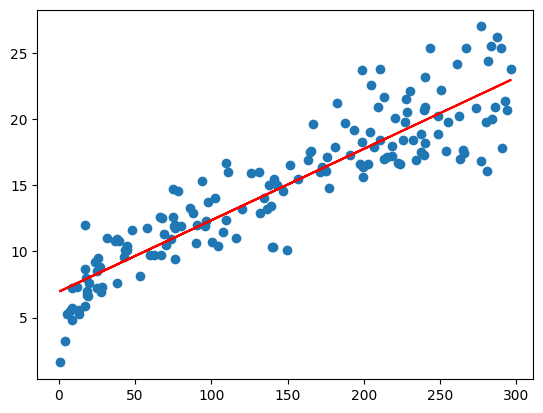

In [27]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [28]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-29-723b49e70e34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


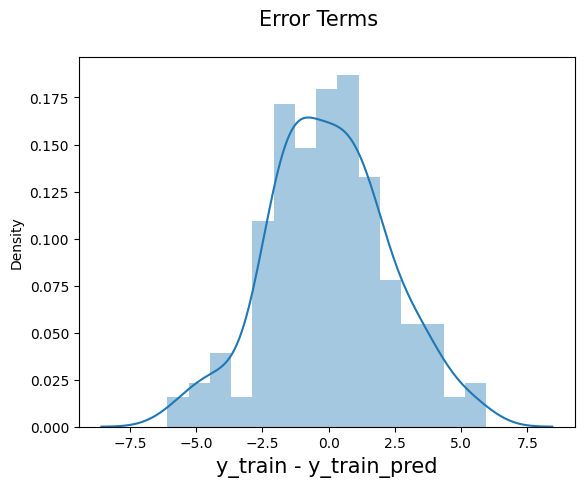

In [29]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

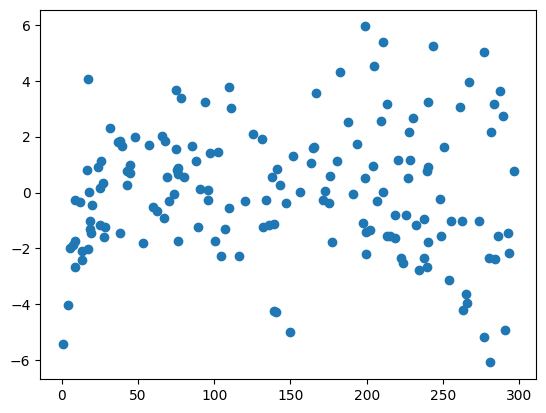

In [30]:
plt.scatter(X_train,res)
plt.show()

Predictions on the test set

In [31]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [32]:
y_pred.head()

,0
126,7.417556
104,19.883459
99,14.310594
92,18.774296
111,20.072828


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.3126831803046124

In [35]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.728135274407888

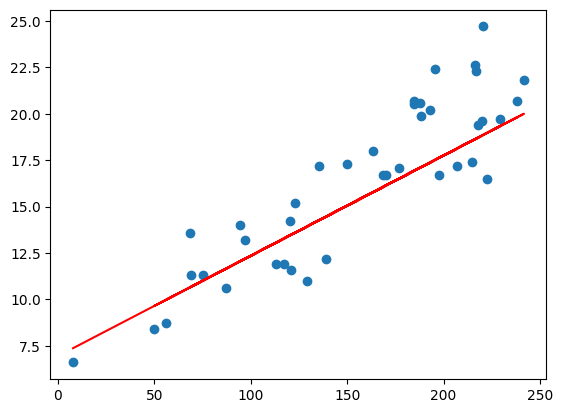

In [36]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()